# Portfolio Project Introduction: Predicting the Housing Market

**This project will look to create a machine learning neural network that can predict housing prices. The goal is to train a model with accuracy greater than 95% using as few variables as is necessary.** Data used come from Boston, Massechustet's historical housing market data. The aim of this project is primarily demonstartive of ML and NN applications, therefore the model is not intended to be used outside of this context.

Key skills used:
* machine learning
* neural networks
* tensorflow
* statistical analysis
* interpretive visualization

## Final Result
**The model reached about 98.5% accuracy on the test data, indicating baseline suitability for deployment on future iterations of this data. Data required include just the crime rate of the area, room count of the home, tax rate, parent-teacher ratio of the school zone, and the socieconmoic status of that neigborhood.**


# Setup

In [364]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !pip install -q -U tfx==0.21.2
    print("You can safely ignore the package incompatibility errors.")
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(24)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [425]:
# pulling the data into testing and training sets
(training, training_target), (testing, testing_target) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.1, seed=24)

In [427]:
# prepping data for exploration

#import pandas as pd

cols = ["crime", "zone_res", "industry", "charles_river", "nox", "rooms", 
        "age_unit", "distance_jobs", "radial_access", "tax_rate", "pt_ratio",
        "blacks", "low_socioec"]
df_trn = pd.DataFrame(data= training, columns=cols)
df_trn.head()

,crime,zone_res,industry,charles_river,nox,rooms,age_unit,distance_jobs,radial_access,tax_rate,pt_ratio,blacks,low_socioec
0,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
1,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47
2,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65
3,0.14476,0.0,10.01,0.0,0.547,5.731,65.2,2.7592,6.0,432.0,17.8,391.50,13.61
4,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49


# Data Exploration


In [368]:
# finding empty cells

np.where(pd.isnull(df_trn))
# no nulls or nans

(array([], dtype=int64), array([], dtype=int64))

In [369]:
# determining sparsity of features

df_trn.zone_res.unique()
df_trn.zone_res.value_counts()
#The ouput shoes that this feature is pretty saprse
#336 out of 465 rows are zero

zone_res
0.0      336
20.0      19
80.0      12
12.5      10
22.0      10
25.0       8
40.0       7
45.0       6
30.0       5
90.0       5
33.0       4
95.0       4
60.0       3
55.0       3
75.0       3
35.0       3
28.0       3
34.0       2
70.0       2
52.5       2
85.0       2
82.5       2
21.0       1
100.0      1
17.5       1
18.0       1
Name: count, dtype: int64

In [431]:
df_trn.charles_river.value_counts()
#same for the Charles River feature

charles_river
0.0    425
1.0     30
Name: count, dtype: int64

In [433]:
df_trn.radial_access.value_counts()
# this feature is notas  sparse

radial_access
24.0    115
5.0     102
4.0     102
3.0      37
6.0      24
2.0      23
8.0      20
1.0      17
7.0      15
Name: count, dtype: int64

In [435]:
# exploring basics feature stats

print(df_trn.crime.describe(),
df_trn.industry.describe(),
df_trn.nox.describe(),
df_trn.rooms.describe(),
df_trn.age_unit.describe(),
df_trn.distance_jobs.describe(),
df_trn.radial_access.describe(),
df_trn.tax_rate.describe(),
df_trn.pt_ratio.describe(),
df_trn.blacks.describe(),
df_trn.low_socioec.describe(),
)
# below are the descriptives for the remaining variables

count    455.000000
mean       3.371257
std        8.153937
min        0.006320
25%        0.082100
50%        0.245220
75%        3.504645
max       88.976200
Name: crime, dtype: float64 count    455.000000
mean      11.061956
std        6.863692
min        0.460000
25%        5.130000
50%        9.690000
75%       18.100000
max       27.740000
Name: industry, dtype: float64 count    455.000000
mean       0.553782
std        0.116222
min        0.385000
25%        0.448000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64 count    455.000000
mean       6.281567
std        0.692813
min        3.561000
25%        5.887500
50%        6.185000
75%        6.599500
max        8.780000
Name: rooms, dtype: float64 count    455.000000
mean      68.421099
std       27.827398
min        2.900000
25%       45.500000
50%       76.700000
75%       93.550000
max      100.000000
Name: age_unit, dtype: float64 count    455.000000
mean       3.798942
std        2.068

# Data Exploration Visualization

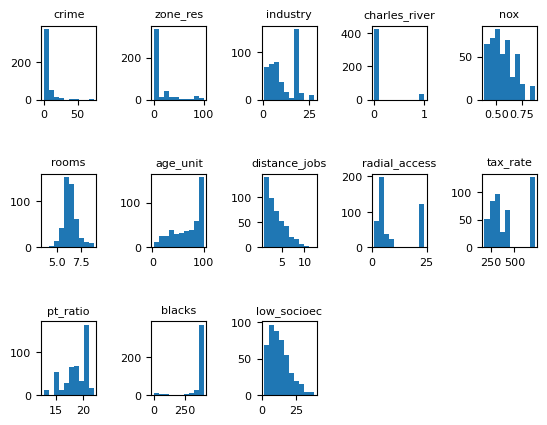

In [374]:
# pulling histograms for each feature

#for c in df_trn.columns:
for i, col in enumerate(df_trn.columns):
    # plt.figure()
    plt.subplot(3, 5, i + 1)
    plt.title(col)
    plt.hist(df_trn[col])
    plt.subplots_adjust(hspace=1, wspace=1)
  
# The shapes of some of these histograms indicates many of these features may
# be excluded from the model. Ex: crime, zone_res, charles_riv 
# given their limited distributional variance etc.

In [375]:
# pulling a correlation matirx

temp = df_trn
temp['median_value'] = training_target.tolist()
corr = temp.corr()
corr.style.background_gradient(cmap = "YlOrRd")

,crime,zone_res,industry,charles_river,nox,rooms,age_unit,distance_jobs,radial_access,tax_rate,pt_ratio,blacks,low_socioec,median_value
crime,1.000000,-0.215218,0.435979,-0.058710,0.446191,-0.269870,0.384748,-0.403082,0.665789,0.618751,0.308884,-0.463488,0.489957,-0.406185
zone_res,-0.215218,1.000000,-0.526878,-0.029286,-0.514408,0.303257,-0.570974,0.656453,-0.315084,-0.321573,-0.371483,0.170509,-0.407757,0.352001
industry,0.435979,-0.526878,1.000000,0.045316,0.769038,-0.400822,0.654890,-0.710067,0.598658,0.737780,0.387162,-0.353381,0.611902,-0.495793
charles_river,-0.058710,-0.029286,0.045316,1.000000,0.082559,0.103612,0.061341,-0.086476,-0.012595,-0.044503,-0.125944,0.040430,-0.073613,0.176566
nox,0.446191,-0.514408,0.769038,0.082559,1.000000,-0.320873,0.731840,-0.765792,0.595811,0.660287,0.170638,-0.380191,0.596784,-0.439613
rooms,-0.269870,0.303257,-0.400822,0.103612,-0.320873,1.000000,-0.254097,0.216859,-0.220256,-0.310910,-0.340016,0.143052,-0.616856,0.694799
age_unit,0.384748,-0.570974,0.654890,0.061341,0.731840,-0.254097,1.000000,-0.748288,0.464882,0.520329,0.259135,-0.274038,0.600833,-0.385172
distance_jobs,-0.403082,0.656453,-0.710067,-0.086476,-0.765792,0.216859,-0.748288,1.000000,-0.496932,-0.542424,-0.226203,0.290208,-0.495987,0.254918
radial_access,0.665789,-0.315084,0.598658,-0.012595,0.595811,-0.220256,0.464882,-0.496932,1.000000,0.906585,0.466124,-0.432066,0.491192,-0.378858
tax_rate,0.618751,-0.321573,0.737780,-0.044503,0.660287,-0.310910,0.520329,-0.542424,0.906585,1.000000,0.465763,-0.427656,0.555700,-0.476825


This shows a simple correlation matrix for each feature against each other and 
the target variable

Low socioeconomics and average room count have the strongest negative and 
positive correlations with home calue, respectively. The Charles River
feature had the weakest correlation, which tracks with how sparse the 
data was above. The "zone_res" variabel was faily weak, but not less so than  many of the other features.

Based on the above descriptives, it may be best to exclude the Charles River variable from the model.

In [377]:
df_trn.median_value.describe()

count    455.000000
mean      22.545055
std        9.342156
min        5.000000
25%       16.750000
50%       21.100000
75%       25.050000
max       50.000000
Name: median_value, dtype: float64

In [378]:
df_trn.columns

Index(['crime', 'zone_res', 'industry', 'charles_river', 'nox', 'rooms',
       'age_unit', 'distance_jobs', 'radial_access', 'tax_rate', 'pt_ratio',
       'blacks', 'low_socioec', 'median_value'],
      dtype='object')

In [379]:

df_trn_clean = df_trn.drop([#'crime', 
                            'zone_res',
                            'industry', 
                            'charles_river',
                            'nox', 
                            #'rooms',
                            'age_unit',
                            'distance_jobs', 
                            'radial_access', 
                            #'tax_rate', 
                            #'pt_ratio',
                            'blacks', 
                            #'low_socioec', 
                            'median_value'], axis = 1) 

training_clean = df_trn_clean.to_numpy()
tf.keras.utils.normalize(training_clean, axis=1)


array([[8.73465590e-03, 9.77277924e-03, 9.99335326e-01, 3.03101705e-02,
        1.54401809e-02],
       [2.79213881e-03, 1.24218429e-02, 9.98803407e-01, 3.64327794e-02,
        3.00384548e-02],
       [3.20724392e-04, 2.90709860e-02, 9.96417398e-01, 7.80865879e-02,
        1.44785548e-02],
       ...,
       [2.57647637e-04, 7.60704753e-03, 9.99004580e-01, 2.82419016e-02,
        3.36795215e-02],
       [7.25588118e-03, 8.86040164e-03, 9.99327264e-01, 3.03099260e-02,
        1.71806264e-02],
       [1.34806328e-03, 1.45578497e-02, 9.98396158e-01, 4.84347793e-02,
        2.54054125e-02]])

# Model 1


In [381]:
model1= keras.models.Sequential([
      keras.layers.InputLayer(shape=(5,)),
      keras.layers.Dense(128, activation='sigmoid',
                        kernel_initializer="he_normal",
                        kernel_regularizer=keras.regularizers.l2(0.01)),
      # keras.layers.PReLU(),
      # keras.layers.Dropout(rate=0.15),
      # keras.layers.Dense(32, activation='sigmoid',
      #                   kernel_initializer="he_normal",
      #                   kernel_regularizer=keras.regularizers.l2(0.01)),
      keras.layers.LeakyReLU(),
      keras.layers.Dense(1, activation="linear",
                        kernel_initializer="he_normal",
                        kernel_regularizer=keras.regularizers.l2(0.01))
]) 

#opt = keras.optimizers.SGD(lr=0.5, decay=1e-4)
#opt = keras.optimizers.RMSprop(learning_rate=0.01)
#opt = keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.999)
opt = keras.optimizers.Adamax(learning_rate=0.0133, beta_1= 0.999, beta_2 = 0.999)


model1.compile(optimizer = opt,
               loss='mse', 
               metrics=[tf.keras.metrics.RootMeanSquaredError()])

model1.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [382]:
history = model1.fit(training_clean, 
                     training_target, 
                     epochs = 1300,
                     validation_split = 0.1)

Epoch 1/1300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 464.3606 - root_mean_squared_error: 21.4596 - val_loss: 141.5422 - val_root_mean_squared_error: 11.8187
Epoch 2/1300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 185.0172 - root_mean_squared_error: 13.5111 - val_loss: 57.9153 - val_root_mean_squared_error: 7.5228
Epoch 3/1300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.1671 - root_mean_squared_error: 10.2282 - val_loss: 62.4476 - val_root_mean_squared_error: 7.8389
Epoch 4/1300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.8686 - root_mean_squared_error: 9.7913 - val_loss: 104.0433 - val_root_mean_squared_error: 10.1602
Epoch 5/1300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.8421 - root_mean_squared_error: 10.7700 - val_loss: 139.1618 - val_root_mean_squared_error: 11.7665
Epoch 6/1300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125.8900 - root_mean_squared_error: 11.1809 - val_loss: 141.5177 - val_root_mean_squared_error: 11.8686
Epoch 7/1300
13/13 ━━

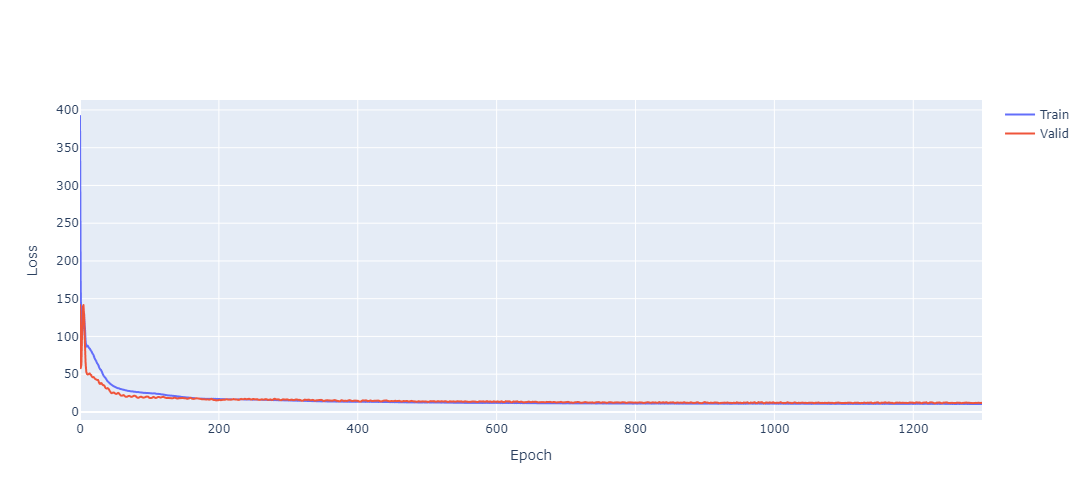

In [383]:
import plotly.graph_objects as plt

fig = plt.Figure()
fig.add_trace(plt.Scattergl(y=history.history['loss'],
                    name='Train'))
fig.add_trace(plt.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [384]:
df_tst = pd.DataFrame(data= testing, columns=cols)

df_tst_clean = df_tst.drop([#'crime', 
                            'zone_res',
                            'industry', 
                            'charles_river',
                            'nox', 
                            #'rooms',
                            'age_unit',
                            'distance_jobs', 
                            'radial_access', 
                            #'tax_rate', 
                            #'pt_ratio',
                            'blacks'
                            #'low_socioec'
                            ], axis = 1) 


testing_clean = df_tst_clean.to_numpy()
tf.keras.utils.normalize(testing_clean, axis=1)

array([[3.63611791e-04, 2.44361220e-02, 9.95803732e-01, 6.88456901e-02,
        5.51175317e-02],
       [2.74255048e-04, 2.15604921e-02, 9.98016916e-01, 5.52236027e-02,
        2.11579586e-02],
       [2.19920660e-04, 2.67146161e-02, 9.97028367e-01, 6.89303563e-02,
        2.16638263e-02],
       [1.45969285e-04, 2.38739456e-02, 9.97261588e-01, 6.74304989e-02,
        1.87740705e-02],
       [1.00775502e-02, 1.01244747e-02, 9.99096188e-01, 3.03029174e-02,
        2.61625188e-02],
       [4.39763627e-03, 1.97106763e-02, 9.96570755e-01, 6.81693351e-02,
        4.23299109e-02],
       [3.77899078e-04, 3.16665187e-02, 9.91556547e-01, 1.00737926e-01,
        7.52633613e-02],
       [1.34828246e-03, 1.93893193e-02, 9.93864074e-01, 6.67359992e-02,
        8.60392076e-02],
       [1.93197297e-04, 1.59879877e-02, 9.98793575e-01, 4.44718307e-02,
        1.33415492e-02],
       [1.42703577e-02, 1.00919383e-02, 9.98993892e-01, 3.02998147e-02,
        2.80648284e-02],
       [2.81152694e-04, 1.9707

In [385]:
history2 = model1.fit(testing_clean, 
                    testing_target, 
                    epochs = 1000)

# import plotly.graph_objects as plt

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3078 - root_mean_squared_error: 2.9985 
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9984 - root_mean_squared_error: 2.9477 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.4155 - root_mean_squared_error: 3.0136 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.1556 - root_mean_squared_error: 2.9717
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 10.8038 - root_mean_squared_error: 2.7325 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.2840 - root_mean_squared_error: 2.8242
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3233 - root_mean_squared_error: 2.8312 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.6510 - root_mean_squared_error: 2.8858 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.6621 - root_mean_squared_error: 2.7101
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9676 - root_mean_squared_error:

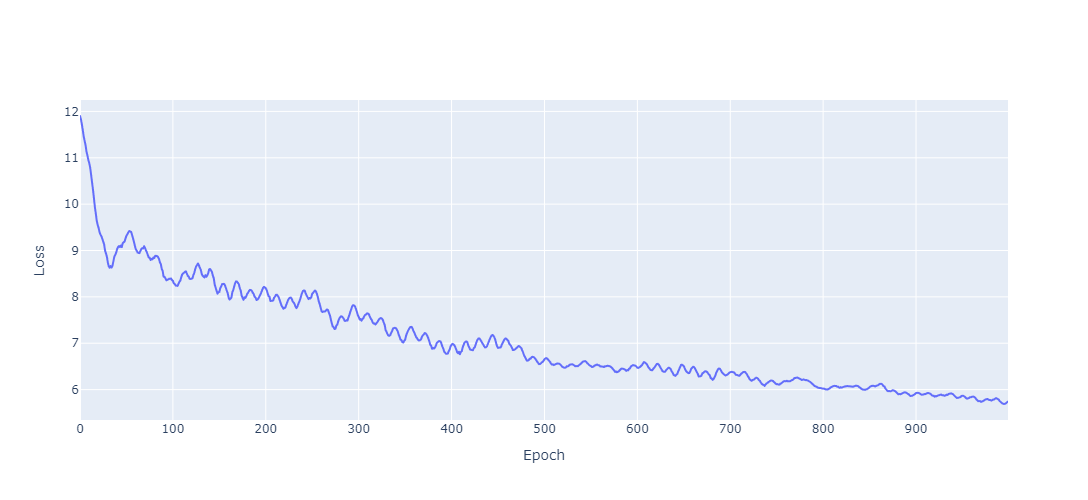

In [386]:
fig = plt.Figure()
fig.add_trace(plt.Scattergl(y=history2.history['loss'],
                    name='Train'))
# fig.add_trace(plt.Scattergl(y=history2.history['val_loss'],
#                     name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

# Analysis

## Final model result
The resulting RMSE on the testing data came in at 1.4756 (~98.5% accuracy) after 1000 epochs. 

## Final model parameters
After several dozen runs on the training set, I decided to use crime rate, room count, tax rate, parent-teacher ratio, and low socieconmoic status. Each feature was normalized before tuning. Only input, hidden, and output layers were used. The hidden had 128 nodes with a sigmoid activation (The blocked out hidden layer made the model worse). Leaky ReLu was added to improve the stalling loss in previous runs. The "normal" was used as the kernal initializer for each appropriate layer. Kernal regularizer tuning was also used with l2 = 0.01. After testing several optimizers, Adamax performed best, with Adam close behind. The learning rate was optimized at 0.0133 with beta 1 and 2 both at 0.999.

## Contextual interpretation
Thinking about the variables used (crime rate, room count, tax rate, parent-teacher ratio, and low socieconmoic status), they all logically connect to property value. Crime rate and low socioeconomic status would logically be negatively related to higher property values, assuming that peopple in those conditions wouldn't be able to afford to live in more expensive places. Tax rate and parent-teacher ratios go hand-in-hand in terms of showing how property value affects taxes which affects funding for schools. The reltationship is also intuitive there. Last, room count could indirectly be associated with square footage, and ususally higher square footage means higher property values--regardless of the neighborhood conditions.